#### Данный датасет основывается на данных о настольных играх с веб-сайта BoardGameGeek (BGG) за февраль 2021 года.
#### BGG — это крупнейшая онлайн-коллекция данных о настольных играх, которая состоит из данных о более чем 100 000 игр (с рейтингом и без рейтинга).

##### В задании необходимо разработать алгоритм, который сможет предсказывать средний рейтинг игры `Rating Average`

In [11]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
train_data = pd.read_csv('data for Hw_3/train_data.csv')
train_data.head()

,ID,Name,Year Published,Min Players,Max Players,Play Time,Min Age,Users Rated,Rating Average,BGG Rank,Complexity Average,Owned Users,Mechanics,Domains
0,174430.0,Gloomhaven,2017.0,1,4,120,14,42055,"8,79",1,"3,86",68323.0,"Action Queue, Action Retrieval, Campaign / Bat...","Strategy Games, Thematic Games"
1,224517.0,Brass: Birmingham,2018.0,2,4,120,14,19217,"8,66",3,"3,91",28785.0,"Hand Management, Income, Loans, Market, Networ...",Strategy Games
2,167791.0,Terraforming Mars,2016.0,1,5,120,12,64864,"8,43",4,"3,24",87099.0,"Card Drafting, Drafting, End Game Bonuses, Han...",Strategy Games
3,233078.0,Twilight Imperium: Fourth Edition,2017.0,3,6,480,14,13468,"8,70",5,"4,22",16831.0,"Action Drafting, Area Majority / Influence, Ar...","Strategy Games, Thematic Games"
4,291457.0,Gloomhaven: Jaws of the Lion,2020.0,1,4,120,14,8392,"8,87",6,"3,55",21609.0,"Action Queue, Campaign / Battle Card Driven, C...","Strategy Games, Thematic Games"


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15257 entries, 0 to 15256
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  15247 non-null  float64
 1   Name                15257 non-null  object 
 2   Year Published      15256 non-null  float64
 3   Min Players         15257 non-null  int64  
 4   Max Players         15257 non-null  int64  
 5   Play Time           15257 non-null  int64  
 6   Min Age             15257 non-null  int64  
 7   Users Rated         15257 non-null  int64  
 8   Rating Average      15257 non-null  object 
 9   BGG Rank            15257 non-null  int64  
 10  Complexity Average  15257 non-null  object 
 11  Owned Users         15240 non-null  float64
 12  Mechanics           14057 non-null  object 
 13  Domains             7608 non-null   object 
dtypes: float64(3), int64(6), object(5)
memory usage: 1.6+ MB


##### Columns
---
`ID` - Идентификатор настольной игры\
`Name` - Имя\
`Year Published` - Год публикации\
`Min Players` - Рекомендуемое минимальное количество игроков\
`Max Players` - Рекомендуемое максимальное количество игроков\
`Play Time` - Время игры\
`Min Age` - Рекомендуемый минимальный возраст игроков\
`Users Rated` - Количество пользователей, оценивших игру\
`Rating Average` - Средний рейтинг, полученный игрой (целевая переменная)\
`BGG Rank` - Рейтинг от BGG\
`Complexity Average` - Среднее значение сложности игры\
`Owned Users` - Количество зарегистрированных BGG владельцев игры\
`Mechanics` - Механика, используемая в игре\
`Domains` - Домены настольных игр, которым принадлежит игра

In [230]:
train_data['Rating Average'].value_counts()

Rating Average
6,50    89
6,53    82
6,10    82
6,43    82
6,35    81
        ..
2,14     1
1,54     1
3,51     1
3,18     1
2,68     1
Name: count, Length: 610, dtype: int64

Посмотрим на пропуски в датасете

In [231]:
train_data.isna().sum()

ID                      10
Name                     0
Year Published           1
Min Players              0
Max Players              0
Play Time                0
Min Age                  0
Users Rated              0
Rating Average           0
BGG Rank                 0
Complexity Average       0
Owned Users             17
Mechanics             1200
Domains               7649
dtype: int64

In [232]:
train_data_nan = train_data.loc[:, train_data.isnull().any()]
train_data_nan.isnull().sum() / len(train_data_nan) * 100

ID                 0.065544
Year Published     0.006554
Owned Users        0.111424
Mechanics          7.865242
Domains           50.134365
dtype: float64

In [233]:
train_data['Mechanics'].unique()

array(['Action Queue, Action Retrieval, Campaign / Battle Card Driven, Card Play Conflict Resolution, Communication Limits, Cooperative Game, Deck Construction, Deck Bag and Pool Building, Grid Movement, Hand Management, Hexagon Grid, Legacy Game, Modular Board, Once-Per-Game Abilities, Scenario / Mission / Campaign Game, Simultaneous Action Selection, Solo / Solitaire Game, Storytelling, Variable Player Powers',
       'Hand Management, Income, Loans, Market, Network and Route Building, Score-and-Reset Game, Tech Trees / Tech Tracks, Turn Order: Stat-Based, Variable Set-up',
       'Card Drafting, Drafting, End Game Bonuses, Hand Management, Hexagon Grid, Income, Set Collection, Solo / Solitaire Game, Take That, Tile Placement, Turn Order: Progressive, Variable Player Powers',
       ..., 'Hand Management, Hot Potato, Set Collection',
       'Auction/Bidding, Income, Loans, Lose a Turn, Player Elimination, Roll / Spin and Move, Set Collection, Stock Holding, Track Movement, Trading',


In [234]:
train_data['Domains'].unique()

array(['Strategy Games, Thematic Games', 'Strategy Games',
       'Thematic Games', 'Family Games, Strategy Games',
       'Customizable Games, Thematic Games',
       'Abstract Games, Family Games', 'Customizable Games',
       'Family Games', 'Wargames', 'Party Games', 'Abstract Games',
       'Customizable Games, Strategy Games',
       'Family Games, Thematic Games', 'Family Games, Party Games',
       'Thematic Games, Wargames', 'Strategy Games, Wargames',
       'Abstract Games, Strategy Games', 'Customizable Games, Wargames',
       'Party Games, Thematic Games', "Children's Games, Family Games",
       nan, 'Party Games, Strategy Games', "Children's Games",
       'Abstract Games, Customizable Games',
       'Family Games, Strategy Games, Thematic Games',
       'Family Games, Party Games, Thematic Games',
       'Strategy Games, Thematic Games, Wargames',
       'Family Games, Wargames', "Children's Games, Party Games",
       "Abstract Games, Children's Games",
       'Family

In [7]:
train_data['Mechanics']

0        Action Queue, Action Retrieval, Campaign / Bat...
1        Hand Management, Income, Loans, Market, Networ...
2        Card Drafting, Drafting, End Game Bonuses, Han...
3        Action Drafting, Area Majority / Influence, Ar...
4        Action Queue, Campaign / Battle Card Driven, C...
                               ...                        
15252                                 Roll / Spin and Move
15253                                                  NaN
15254                                 Roll / Spin and Move
15255    Dice Rolling, Grid Movement, Race, Roll / Spin...
15256                   Paper-and-Pencil, Pattern Building
Name: Mechanics, Length: 15257, dtype: object

In [3]:
train_data['Mechanics'] = train_data['Mechanics'].fillna('Common Mechanics')
train_data['Domains'] = train_data['Domains'].fillna('Unknown Domain')
train_data['Owned Users'] = train_data['Owned Users'].fillna(0)
train_data = train_data[train_data['ID'].notna()]
train_data = train_data[train_data['Year Published'].notna()]

In [20]:
mechanics_dummies = train_data['Mechanics'].str.get_dummies(', ').add_prefix('Mechanics_')
domains_dummies = train_data['Domains'].str.get_dummies(', ').add_prefix('Domains_')

train_data_extended = pd.concat([
    train_data[['Year Published', 'Min Players', 'Max Players', 'Play Time', 
                'Min Age', 'Users Rated', 'Complexity Average', 'Owned Users', 'BGG Rank']],
    mechanics_dummies,
    domains_dummies
], axis=1)
train_data_extended

,Year Published,Min Players,Max Players,Play Time,Min Age,Users Rated,Complexity Average,Owned Users,BGG Rank,Mechanics_Acting,...,Mechanics_Worker Placement with Dice Workers,Mechanics_Zone of Control,Domains_Abstract Games,Domains_Children's Games,Domains_Customizable Games,Domains_Family Games,Domains_Party Games,Domains_Strategy Games,Domains_Thematic Games,Domains_Wargames
0,2017.0,1,4,120,14,42055,"3,86",68323.0,1,0,...,0,0,0,0,0,0,0,1,1,0
1,2018.0,2,4,120,14,19217,"3,91",28785.0,3,0,...,0,0,0,0,0,0,0,1,0,0
2,2016.0,1,5,120,12,64864,"3,24",87099.0,4,0,...,0,0,0,0,0,0,0,1,0,0
3,2017.0,3,6,480,14,13468,"4,22",16831.0,5,0,...,0,0,0,0,0,0,0,1,1,0
4,2020.0,1,4,120,14,8392,"3,55",21609.0,6,0,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15252,1965.0,2,4,45,4,3255,"1,05",4962.0,20339,0,...,0,0,0,1,0,0,0,0,0,0
15253,0.0,2,2,30,4,1340,1,427.0,20340,0,...,0,0,0,1,0,0,0,0,0,0
15254,1949.0,2,4,30,3,4006,"1,08",5788.0,20342,0,...,0,0,0,1,0,0,0,0,0,0
15255,-200.0,2,6,30,3,3783,"1,02",4400.0,20343,0,...,0,0,0,1,0,0,0,0,0,0


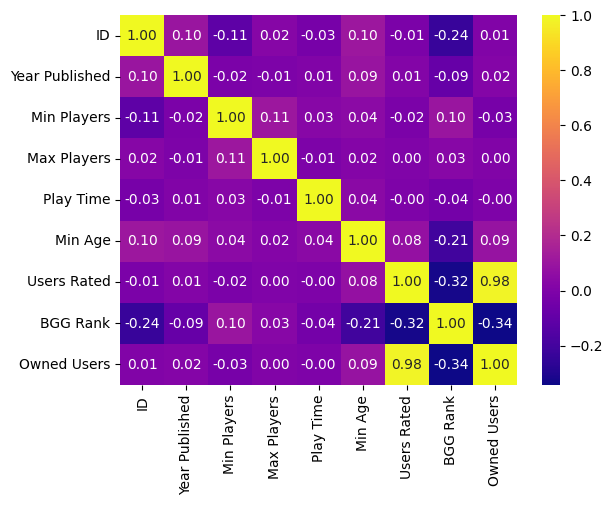

In [31]:
corr_mtrx = train_data.corr(numeric_only = True)
sns.heatmap(corr_mtrx, annot = True, cmap = 'plasma', fmt = '.2f')
plt.show()

In [11]:
train_data_extended.drop(labels = 'Users Rated', axis = 1)

,Year Published,Min Players,Max Players,Play Time,Min Age,Complexity Average,Owned Users,BGG Rank,Acting,Action Drafting,...,Zone of Control,Abstract Games,Children's Games,Customizable Games,Family Games,Party Games,Strategy Games,Thematic Games,Unknown Domain,Wargames
0,2017.0,1,4,120,14,"3,86",68323.0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
1,2018.0,2,4,120,14,"3,91",28785.0,3,0,0,...,0,0,0,0,0,0,1,0,0,0
2,2016.0,1,5,120,12,"3,24",87099.0,4,0,0,...,0,0,0,0,0,0,1,0,0,0
3,2017.0,3,6,480,14,"4,22",16831.0,5,0,1,...,0,0,0,0,0,0,1,1,0,0
4,2020.0,1,4,120,14,"3,55",21609.0,6,0,0,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15252,1965.0,2,4,45,4,"1,05",4962.0,20339,0,0,...,0,0,1,0,0,0,0,0,0,0
15253,0.0,2,2,30,4,1,427.0,20340,0,0,...,0,0,1,0,0,0,0,0,0,0
15254,1949.0,2,4,30,3,"1,08",5788.0,20342,0,0,...,0,0,1,0,0,0,0,0,0,0
15255,-200.0,2,6,30,3,"1,02",4400.0,20343,0,0,...,0,0,1,0,0,0,0,0,0,0


#### Теперь в датасете нет пропусков

In [14]:
train_data_extended.isna().sum()

Year Published    0
Min Players       0
Max Players       0
Play Time         0
Min Age           0
                 ..
Party Games       0
Strategy Games    0
Thematic Games    0
Unknown Domain    0
Wargames          0
Length: 201, dtype: int64

In [20]:
problem_columns = []

for col in X_train_full.columns:
    if X_train_full[col].dtype == 'object':
        if X_train_full[col].apply(lambda x: isinstance(x, str) and ',' in str(x)).any():
            problem_columns.append(col)

# print(f"колонки с запятыми: {problem_columns}")

In [21]:
for col in problem_columns:
    X_train_full[col] = X_train_full[col].astype(str).str.replace(',', '.').astype(float)

In [22]:
numeric_cols = ['Year Published', 'Min Players', 'Max Players', 'Play Time', 
                'Min Age', 'Users Rated', 'Complexity Average', 'Owned Users', 'BGG Rank']

for col in numeric_cols:
    if col in X_train_full.columns and X_train_full[col].dtype == 'object':
        X_train_full[col] = X_train_full[col].astype(str).str.replace(',', '.').astype(float)

#### Нормализация

In [24]:
features_extended = train_data_extended.columns.tolist()

X_train_full = train_data_extended
y_train_full = train_data['Rating Average'].astype(str).str.replace(',', '.').astype(float)

print(f"X shape: {X_train_full.shape}")
print(f"y shape: {y_train_full.shape}")

mmsc = MinMaxScaler()
X_norm = mmsc.fit_transform(X_train_full)
X_norm = pd.DataFrame(X_norm, columns = X_train_full.columns)
X_norm.describe()

X shape: (15247, 201)
y shape: (15247,)


,Year Published,Min Players,Max Players,Play Time,Min Age,Users Rated,Complexity Average,Owned Users,BGG Rank,Acting,...,Zone of Control,Abstract Games,Children's Games,Customizable Games,Family Games,Party Games,Strategy Games,Thematic Games,Unknown Domain,Wargames
count,15247.000000,15247.000000,15247.000000,15247.000000,15247.000000,15247.000000,15247.000000,15247.000000,15247.000000,15247.000000,...,15247.000000,15247.000000,15247.000000,15247.000000,15247.000000,15247.000000,15247.000000,15247.000000,15247.000000,15247.000000
mean,0.993142,0.202118,0.005649,0.001547,0.383254,0.007731,0.398225,0.008831,0.500504,0.011543,...,0.011478,0.052207,0.041123,0.015216,0.106841,0.028858,0.109267,0.058175,0.501017,0.160687
std,0.038353,0.069641,0.012568,0.010130,0.146845,0.032172,0.169796,0.030135,0.288222,0.106821,...,0.106521,0.222451,0.198581,0.122416,0.308921,0.167413,0.311985,0.234082,0.500015,0.367254
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.996197,0.200000,0.004004,0.000500,0.320000,0.000245,0.266000,0.000940,0.250627,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.998008,0.200000,0.004004,0.000750,0.400000,0.000871,0.400000,0.001983,0.499631,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.998913,0.200000,0.006006,0.001500,0.480000,0.003425,0.508000,0.005508,0.750848,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
model = LinearRegression()
model.fit(X_norm, y_train_full)
y_pred = model.predict(X_norm)

model.fit(X_norm, y_train_full)
y_pred = model.predict(X_norm)

mae_train = mean_absolute_error(y_train_full, y_pred)
mse_train = mean_squared_error(y_train_full, y_pred)
r2_train = r2_score(y_train_full, y_pred)

print(f"MAE: {mae_train:.4f}")
print(f"MSE: {mse_train:.4f}")
print(f"R2 score: {r2_train:.4f}")

MAE: 0.3905
MSE: 0.2874
R2 score: 0.6720


In [27]:
coeff_train_data = pd.DataFrame(model.coef_, columns = ['Coefficient'])
coeff_train_data['Features'] = features_extended

coeff_train_data.sort_values(by = 'Coefficient')

,Coefficient,Features
7,-7.171653,Owned Users
8,-2.433603,BGG Rank
22,-0.530562,Auction: Dexterity
1,-0.516108,Min Players
78,-0.417583,Hot Potato
...,...,...
76,0.652132,Hidden Victory Points
125,0.712592,Pieces as Map
3,0.827045,Play Time
6,0.870662,Complexity Average


In [28]:
test_data = pd.read_csv('data for Hw_3/test_data.csv')
test_data

,ID,Name,Year Published,Min Players,Max Players,Play Time,Min Age,Users Rated,BGG Rank,Complexity Average,Owned Users,Mechanics,Domains
0,161936.0,Pandemic Legacy: Season 1,2015.0,2,4,60,13,41643,2,"2,84",65294.0,"Action Points, Cooperative Game, Hand Manageme...","Strategy Games, Thematic Games"
1,12333.0,Twilight Struggle,2005.0,2,2,180,13,40814,10,"3,59",56219.0,"Action/Event, Advantage Token, Area Majority /...","Strategy Games, Wargames"
2,115746.0,War of the Ring: Second Edition,2012.0,2,4,180,13,13725,12,"4,14",22281.0,"Area Majority / Influence, Area Movement, Camp...","Thematic Games, Wargames"
3,169786.0,Scythe,2016.0,1,5,115,14,57871,14,"3,41",75640.0,"Area Majority / Influence, Card Play Conflict ...",Strategy Games
4,28720.0,Brass: Lancashire,2007.0,2,4,120,14,19400,19,"3,86",25429.0,"Hand Management, Income, Loans, Network and Ro...",Strategy Games
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5081,6932.0,Hi Ho! Cherry-O,1960.0,2,4,10,3,1035,20325,"1,03",1691.0,"Cooperative Game, Roll / Spin and Move",Children's Games
5082,3510.0,Battle of the Sexes,1997.0,2,8,45,12,1090,20328,"1,08",1987.0,Team-Based Game,Party Games
5083,5895.0,Hungry Hungry Hippos,1978.0,2,4,10,4,2361,20330,"1,05",2568.0,NaN,Children's Games
5084,2679.0,Mouse Trap,1963.0,2,4,30,6,2693,20333,"1,11",3408.0,Roll / Spin and Move,Children's Games


#### Обработка тестовых данных

In [29]:
test_data_clean = test_data.copy()
test_data_clean['Mechanics'] = test_data_clean['Mechanics'].fillna('Common Mechanics')
test_data_clean['Domains'] = test_data_clean['Domains'].fillna('Unknown Domain')
test_data_clean['Owned Users'] = test_data_clean['Owned Users'].fillna(0)

test_mechanics_dummies = test_data_clean['Mechanics'].str.get_dummies(', ')
test_domains_dummies = test_data_clean['Domains'].str.get_dummies(', ')

test_data_extended = pd.concat([
    test_data_clean[['Year Published', 'Min Players', 'Max Players', 'Play Time', 
                     'Min Age', 'Users Rated', 'BGG Rank', 'Complexity Average', 'Owned Users']],
    test_mechanics_dummies,
    test_domains_dummies
], axis=1)

X_test_submission = test_data_extended.reindex(columns=X_train_full.columns, fill_value=0)

for col in X_test_submission.columns:
    if X_test_submission[col].dtype == 'object':
        try:
            X_test_submission[col] = X_test_submission[col].astype(str).str.replace(',', '.').astype(float)
        except:
            X_test_submission[col] = 0
    if X_test_submission[col].isna().any():
        X_test_submission[col] = X_test_submission[col].fillna(0)

X_test_submission_norm = mmsc.transform(X_test_submission)
y_pred_submission = model.predict(X_test_submission_norm)

C:\Users\HonoR\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [30]:
submission = pd.DataFrame({
    'index': test_data.index,
    'Rating Average': y_pred_submission
})
submission.to_csv('submission.csv', index=False)
submission

,index,Rating Average
0,0,7.138487
1,1,7.956579
2,2,8.448059
3,3,8.056525
4,4,7.665543
...,...,...
5081,5081,4.755298
5082,5082,4.692667
5083,5083,4.834373
5084,5084,4.629688
